## Gekoppelde tanks met zoutoplossingen

Student : Hussin Almoustafa

Twee grote tanks, elk gevuld met 100 liter vloeistof, zijn verbonden door pijpleidingen. De vloeistof stroomt van tank A naar tank B met een snelheid van 3 L/min en van B naar A met 1 L/min.
Een zoutoplossing met een concentratie van 0,2 kg/L stroomt in tank A met een snelheid van 6 L/min. De oplossing stroomt uit tank A met een snelheid van 4 L/min en verlaat tank B met een snelheid van 2 L/min.


Voor deze opdracht werd hen gevraagd het verloop van de zoutconcentratie in de tanks in kaart te brengen.
door het gebruik van de euler methode. 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Om de Euler-methode prominenter te maken bij het uitzetten van het verloop in de zoutconcentratie, is het proces nu opgedeeld in stappen.

1 - Eerst wordt de tijdstap bijgewerkt.

2 - Het volume van de tank wordt opnieuw berekend.

3 - De hoeveelheid zout in de tank (in kg) wordt berekend.

4 - De nieuwe concentratie wordt berekend op basis van het volume en de hoeveelheid zout in de tank.


In [21]:
def forward_euler(n):
    
    """ Er zijn verschillende stappenprocedures uitgevoerd. Dit wordt gedaan om de zuiverheid van de code te behouden."""
    # alt-concentratie in kg/L
    x = np.zeros(n + 1)
    y = np.zeros(n + 1)
    
    # kg zout in de tank
    m_x = np.zeros(n + 1)
    m_y = np.zeros(n + 1)
    
    # volume in de tank
    v_x = np.zeros(n + 1)
    v_y = np.zeros(n + 1)
    
    
    # volume op punt 0
    v_x[0] = 100
    v_y[0] = 100
    
    # kg zout op punt 0
    m_x[0] = 0
    m_y[0] = 20


    
    v_o2x = 6 # buiten naar tank x 
    v_x2o = 4  # tank x naar buiten
    v_x2y = 3  # tank x naar tank y
    v_y2x = 1 # tank y naar tank x
    v_y2o = 2 # tank y naar buiten
    c_o2x = 0.2 # conc buiten naar tank x
    



    # concentratie op punt 0
    x[0] = m_x[0] / v_x[0]
    y[0] = m_y[0] / v_y[0]
    
    for step in range(n):
        #update de volumes
        v_x[step + 1] = v_x[step] + v_o2x - v_x2y - v_x2o + v_y2x
        v_y[step + 1] = v_y[step] + v_x2y - v_y2x - v_y2o
        
        # bereken de hoeveelheid bewegend zout
        x_salt_in = (v_o2x * c_o2x) + (v_y2x * y[step])
        x_salt_out = (v_x2y * x[step]) + (v_x2o * x[step])
        
        # de hoeveelheid zout in de tank bijwerken x
        m_x[step + 1] = m_x[step] + x_salt_in - x_salt_out
        
        # bereken de hoeveelheid bewegend zout
        y_salt_in = v_x2y * x[step]
        y_salt_out = (v_y2x * y[step]) + (v_y2o * y[step])
        
        # update de hoeveelheid zout in de tank y
        m_y[step + 1] = m_y[step] + y_salt_in - y_salt_out
        
        # update de concentratie
        x[step + 1] = m_x[step] / v_x[step]
        y[step + 1] = m_y[step] / v_y[step]
    
    return x, y

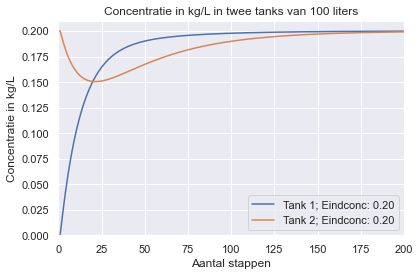

In [22]:
num_steps = 200
Liters = 100
conc_tank1, conc_tank2 = forward_euler(num_steps)
x = [x for x in range(0, num_steps + 1, 1)]

sns.set(context="notebook")



# plot the first tank
plt.plot(x, conc_tank1, label=f"Tank 1; Eindconc: {conc_tank1[-1]:.2f}")
# plot the second tank
plt.plot(x, conc_tank2, label=f"Tank 2; Eindconc: {conc_tank2[-1]:.2f}")

plt.xlim(0, num_steps)
plt.ylim(bottom=0)

plt.title(f"Concentratie in kg/L in twee tanks van {Liters} liters")
plt.xlabel("Aantal stappen")
plt.ylabel("Concentratie in kg/L")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


